c:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:789: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:795: RuntimeWarning: invalid value encountered in divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:789: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:795: RuntimeWarning: invalid value encountered in divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:789: UserWarning: Some inputs do not have OOB scores. This probably 

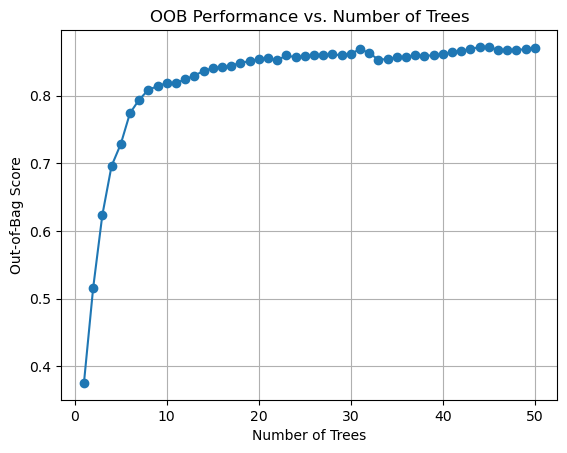

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier


# Part A #

np.set_printoptions(precision = 2, suppress = True)
x_train = pd.read_csv('x1.csv', header = None)
x_val = pd.read_csv('x2.csv', header = None)
x_test = pd.read_csv('x3.csv', header = None)
y_train = pd.read_csv('c1.csv', header = None)
y_val = pd.read_csv('c2.csv', header = None)

x_train_arr = x_train.to_numpy()
x_val_arr = x_val.to_numpy()
x_test_arr = x_test.to_numpy()
y_train_arr = y_train.to_numpy().reshape(-1)
y_val_arr = y_val.to_numpy().reshape(-1)

oob_scores = []
num_trees = range(1, 51)
for n_trees in num_trees:
    bagged_tree = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=n_trees, oob_score=True, random_state=42)
    bagged_tree.fit(x_train_arr, y_train_arr)
    oob_scores.append(bagged_tree.oob_score_)

plt.figure()
plt.plot(num_trees, oob_scores, marker='o', linestyle='-')
plt.xlabel('Number of Trees')
plt.ylabel('Out-of-Bag Score')
plt.title('OOB Performance vs. Number of Trees')
plt.grid()
plt.savefig("./images/QA")

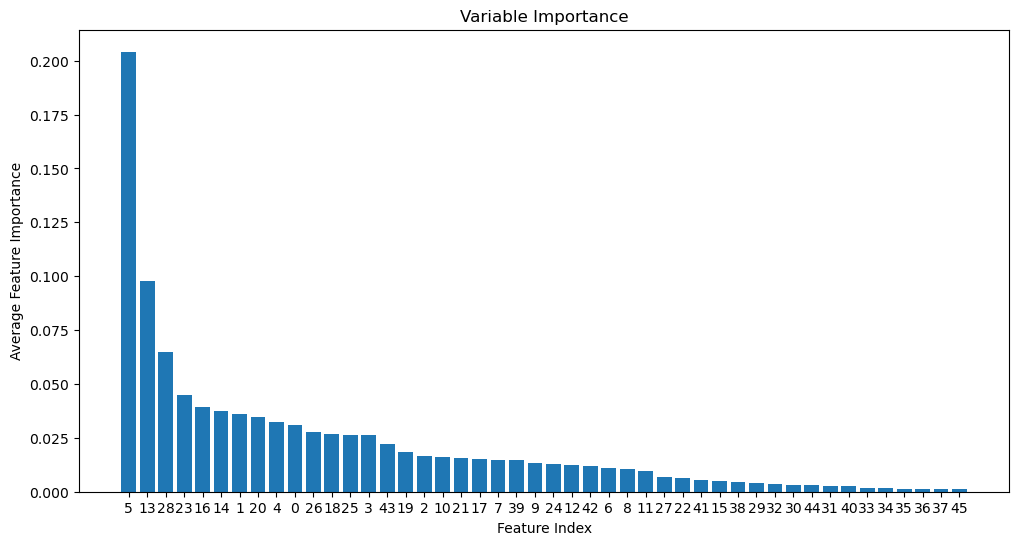

In [8]:
# PART B #

bagged_tree = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50, random_state=42)
bagged_tree.fit(x_train_arr, y_train_arr)
feature_importance = np.mean([tree.feature_importances_ for tree in bagged_tree.estimators_], axis=0)
sorted_indices = np.argsort(feature_importance)[::-1]

plt.figure(figsize=(12, 6))
plt.bar(range(x_train.shape[1]), feature_importance[sorted_indices])
plt.xticks(range(x_train.shape[1]), sorted_indices)
plt.xlabel('Feature Index')
plt.ylabel('Average Feature Importance')
plt.title('Variable Importance')
plt.savefig("./images/QB")


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:789: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:795: RuntimeWarning: invalid value encountered in divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:789: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:795: RuntimeWarning: invalid value encountered in divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:789: UserWarning: Some inputs do not have OOB scores. This probably 

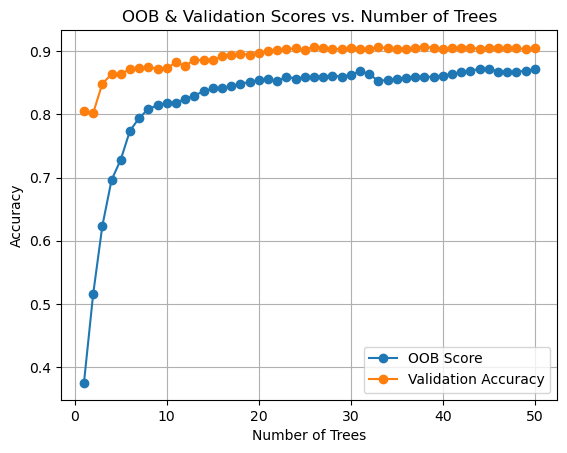

In [15]:
# PART C #

val_scores = []
num_trees = range(1, 51)
for n_trees in num_trees:
    bagged_tree = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=n_trees, oob_score=True, random_state=42)
    bagged_tree.fit(x_train_arr, y_train_arr)
    val_scores.append(bagged_tree.score(x_val_arr, y_val_arr))
  
plt.figure()
plt.plot(num_trees, oob_scores, label='OOB Score', marker='o', linestyle='-')
plt.plot(num_trees, val_scores, label='Validation Accuracy', marker='o', linestyle='-')
plt.xlabel('Number of Trees')
plt.ylabel('Accuracy')
plt.title('OOB & Validation Scores vs. Number of Trees')
plt.legend()
plt.grid()
plt.savefig("./images/QC")